In [159]:
xseed=1990

from numpy.random import seed

seed(xseed)

from tensorflow import set_random_seed

set_random_seed(xseed)

In [160]:
# model averaging ensemble and a study of ensemble size on test accuracy
from sklearn.datasets import make_blobs

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.constraints import maxnorm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

from matplotlib import pyplot

from numpy import array
from numpy import argmax
import numpy
import pandas

import os
from datetime import datetime
import time

In [161]:
def CreateData(dfx,labelCol):
 
 X_df_temp =dfx.drop(columns=['open','high','low','close',labelCol])
 Y_df_temp = dfx[labelCol]

 Xtemp=X_df_temp.to_numpy()
 ytemp=Y_df_temp.to_numpy()

 return X_df_temp,Y_df_temp, Xtemp,ytemp

In [162]:
st='2007'
ed='2015'

test_st='2016'
test_ed='2020'

strategyName='long'

In [163]:
filename='ML-Long_S50M15_07ToNow-Train.csv'
filename_test='ML-Long_S50M15_07ToNow-Train.csv'

filepath=os.path.abspath(f'D:\DataSets\{filename}')
filepath_test=os.path.abspath(f'D:\DataSets\{filename}')

In [164]:
##### load dataset

dataframe = pandas.read_csv(filepath,index_col="datetime", parse_dates=['datetime'],dayfirst=True)

dataframe.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70693 entries, 2007-01-03 09:45:00 to 2020-06-10 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    70693 non-null  float64
 1   high                    70693 non-null  float64
 2   low                     70693 non-null  float64
 3   close                   70693 non-null  float64
 4   indy_ma-550             70693 non-null  float64
 5   indy_ma-1100            70693 non-null  float64
 6   indy_hh-550             70693 non-null  float64
 7   indy_ll-550             70693 non-null  float64
 8   indy_mid-550            70693 non-null  float64
 9   indy_hh2-1100           70693 non-null  float64
 10  indy_ll2-1100           70693 non-null  float64
 11  indy_mid2-1100          70693 non-null  float64
 12  indy_macd110-440        70693 non-null  float64
 13  indy_signal110-440-110  70693 non-null  float64
 14  ind

In [165]:
labelName=dataframe.columns[-1]
labelName

'LongSignal'

# Training Data

In [166]:
df=dataframe[st:ed]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46535 entries, 2007-01-03 09:45:00 to 2015-12-30 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    46535 non-null  float64
 1   high                    46535 non-null  float64
 2   low                     46535 non-null  float64
 3   close                   46535 non-null  float64
 4   indy_ma-550             46535 non-null  float64
 5   indy_ma-1100            46535 non-null  float64
 6   indy_hh-550             46535 non-null  float64
 7   indy_ll-550             46535 non-null  float64
 8   indy_mid-550            46535 non-null  float64
 9   indy_hh2-1100           46535 non-null  float64
 10  indy_ll2-1100           46535 non-null  float64
 11  indy_mid2-1100          46535 non-null  float64
 12  indy_macd110-440        46535 non-null  float64
 13  indy_signal110-440-110  46535 non-null  float64
 14  ind

# Testing Data

In [167]:
dataframe_test = pandas.read_csv(filepath_test,index_col="datetime", parse_dates=['datetime'],dayfirst=True)
df_test=dataframe_test[test_st:test_ed]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24158 entries, 2016-01-04 09:45:00 to 2020-06-10 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    24158 non-null  float64
 1   high                    24158 non-null  float64
 2   low                     24158 non-null  float64
 3   close                   24158 non-null  float64
 4   indy_ma-550             24158 non-null  float64
 5   indy_ma-1100            24158 non-null  float64
 6   indy_hh-550             24158 non-null  float64
 7   indy_ll-550             24158 non-null  float64
 8   indy_mid-550            24158 non-null  float64
 9   indy_hh2-1100           24158 non-null  float64
 10  indy_ll2-1100           24158 non-null  float64
 11  indy_mid2-1100          24158 non-null  float64
 12  indy_macd110-440        24158 non-null  float64
 13  indy_signal110-440-110  24158 non-null  float64
 14  ind

In [168]:
X_df,y_df,X_train,y_train=CreateData(df,labelName)
Xtest_df,ytest_df,X_test,y_test=CreateData(df_test,labelName)

scaler=MinMaxScaler().fit(X_train)

Xtrain_scaled=scaler.transform(X_train)
Xtest_scaled=scaler.transform(X_test)



In [169]:
h1=17
h2=17
h3=0

input_n=X_train.shape[1]

xpoch=110  #105
#xpoch=10

#Epoch 00107: early stopping
xbatch=32

kernelInit='he_uniform'
#kernelInit='he_normal'

print("Input-N =",input_n)
print('Epochs=',xpoch)
print('Batch_size=',xbatch)

Input-N = 17
Epochs= 110
Batch_size= 32


In [170]:
def BaseModel(trainX, trainy):

 model = Sequential()  
  
 model.add(Dense(h1, input_dim=input_n,activation='relu' ))
 model.add(Dense(h2,activation='relu'))
 
 #model.add(Dense(1, activation='sigmoid'))
 #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
 model.add(Dense(2, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
 model.fit(trainX, trainy, epochs=xpoch,batch_size=xbatch)

 return model

In [171]:
def ModelByAllTuning(trainX, trainy):
    model_x=Sequential()
    
    param_dropout=0.02
    vaMaxNorm_WC=4
    
    #l2_val=0.01 #0.865 vs 0.851
    l2_val=0.001 #0.93 vs 0.84
    
     #input
    model_x.add(Dropout(param_dropout, input_shape=(input_n,)))
    
    #layer#1
    model_x.add(Dense(h1,activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC),kernel_regularizer=l2(l2_val)))
    #model_x.add(Dense(h1, kernel_initializer=kernelInit,activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC),kernel_regularizer=l2(l2_val)))
    model_x.add(Dropout(param_dropout))
    
    #layer#2
    model_x.add(Dense(h2, activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC),kernel_regularizer=l2(l2_val)))
    #model_x.add(Dense(h2,kernel_initializer=kernelInit, activation="relu", kernel_constraint=maxnorm(vaMaxNorm_WC),kernel_regularizer=l2(l2_val)))
    model_x.add(Dropout(param_dropout))

    model_x.add(Dense(2, activation='softmax'))
    model_x.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_x.fit(trainX, trainy, epochs=xpoch,batch_size=xbatch)
    
    return model_x

In [172]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
 
 # make predictions
 yhats = [model.predict(testX) for model in members]
 
 #for yhat in yhats:
    #print(yhat[:5])

 yhats = array(yhats)

 #print('sum across ensemble members')
 summed = numpy.sum(yhats, axis=0)
 #print(summed)

 #print('argmax across classes')
 result = argmax(summed, axis=1)
 #print(result)

 return result


In [173]:
def evaluate_n_members(members, n_members, testX, testy):
 # select a subset of members
 subset = members[:n_members]
 #print(len(subset))
 # make prediction
 yhat = ensemble_predictions(subset, testX)
 # calculate accuracy
 return accuracy_score(testy, yhat)


In [174]:
y_train=to_categorical(y_train)

print("X-Train ",Xtrain_scaled.shape)
print("X-Test ",Xtest_scaled.shape)
print("y-Train ",y_train.shape)
print("y-Test ",y_test.shape)

X-Train  (46535, 17)
X-Test  (24158, 17)
y-Train  (46535, 2)
y-Test  (24158,)


In [175]:
print(X_train[:3])
print(Xtrain_scaled[:3])

print(y_train[:3])

[[503.7  508.75 527.   415.   471.   528.2  415.   471.6  -22.5  -27.2
    4.7   39.11 473.92   1.     0.     3.     2.  ]
 [503.62 508.72 527.   415.   471.   528.2  415.   471.6  -22.5  -27.19
    4.68  39.05 473.64   1.     0.     3.     2.  ]
 [503.52 508.68 527.   415.   471.   528.2  415.   471.6  -22.53 -27.17
    4.64  38.91 473.48   1.     0.     3.     2.  ]]
[[0.28007567 0.28688057 0.27881228 0.20506942 0.23529412 0.27549082
  0.2141527  0.23873934 0.33778556 0.29452815 0.5491141  0.30943089
  0.26097673 0.         0.         0.66666667 0.33333333]
 [0.27997272 0.28684081 0.27881228 0.20506942 0.23529412 0.27549082
  0.2141527  0.23873934 0.33778556 0.29460745 0.54883062 0.30845528
  0.26063843 0.         0.         0.66666667 0.33333333]
 [0.27984402 0.2867878  0.27881228 0.20506942 0.23529412 0.27549082
  0.2141527  0.23873934 0.3375666  0.29476606 0.54826364 0.30617886
  0.26044511 0.         0.         0.66666667 0.33333333]]
[[1. 0.]
 [1. 0.]
 [1. 0.]]


In [176]:
t_Start=time.time()


In [177]:
# fit all models


n_members = 10
#members = [my_fit_model(Xtrain_scaled, y_train) for _ in range(n_members)]
members = [ModelByAllTuning(Xtrain_scaled, y_train) for _ in range(n_members)]

Epoch 1/110
46535/46535 [==============================] - 2s 36us/step - loss: 0.3911 - accuracy: 0.8369
Epoch 2/110
46535/46535 [==============================] - 1s 30us/step - loss: 0.3363 - accuracy: 0.8605
Epoch 3/110
46535/46535 [==============================] - 2s 34us/step - loss: 0.3281 - accuracy: 0.8651 0s
Epoch 4/110
46535/46535 [==============================] - 2s 34us/step - loss: 0.3225 - accuracy: 0.8666
Epoch 5/110
46535/46535 [==============================] - 2s 32us/step - loss: 0.3145 - accuracy: 0.8701
Epoch 6/110
46535/46535 [==============================] - 1s 31us/step - loss: 0.3101 - accuracy: 0.8718
Epoch 7/110
46535/46535 [==============================] - 1s 30us/step - loss: 0.3061 - accuracy: 0.8741
Epoch 8/110
46535/46535 [==============================] - 1s 31us/step - loss: 0.2998 - accuracy: 0.8797
Epoch 9/110
46535/46535 [==============================] - 2s 39us/step - loss: 0.2975 - accuracy: 0.8803
Epoch 10/110
46535/46535 [=================

KeyboardInterrupt: 

In [ ]:
t_End=time.time()
t_elapsed=(t_End-t_Start)/60/60
print('Total execute train : ',round(t_elapsed,2))

# evaluate different numbers of ensembles with accuracy_score

In [158]:

scores = list()
single_scores=list()
for i in range(1, n_members+1):
 score = evaluate_n_members(members, i, Xtest_scaled, y_test)
 scores.append(score)
    
 y_test_eval = to_categorical(y_test)    
 _,signle_score=members[i-1].evaluate(Xtest_scaled, y_test_eval, verbose=0)
 single_scores.append(signle_score)  
 
 print(f"{i}# Single {signle_score:.3f} vs Essemble {score:.3f}")

   
print("=======================================================")
print("Summarize average accuracy of a single final model")
print('Single Accuracy %.3f (%.3f)' % (numpy.mean(single_scores), numpy.std(single_scores)))
print('Essemble Accuracy %.3f (%.3f)' % (numpy.mean(scores), numpy.std(scores)))

1# Single 0.733 vs Essemble 0.733
2# Single 0.793 vs Essemble 0.767
3# Single 0.783 vs Essemble 0.780
4# Single 0.821 vs Essemble 0.791
5# Single 0.749 vs Essemble 0.788
6# Single 0.793 vs Essemble 0.783
7# Single 0.780 vs Essemble 0.785
8# Single 0.810 vs Essemble 0.787
9# Single 0.810 vs Essemble 0.788
10# Single 0.801 vs Essemble 0.788
Summarize average accuracy of a single final model
Single Accuracy 0.787 (0.026)
Essemble Accuracy 0.779 (0.016)


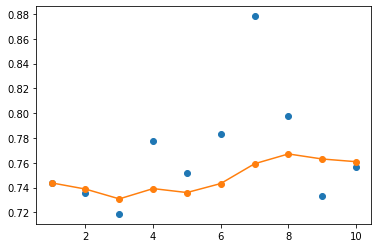

In [137]:
# plot score vs number of ensemble members
x_axis = [i for i in range(1, n_members+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, scores, marker='o')
pyplot.show()